# **EDA**

**Importing required libraries**

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visulaziation : plots , charts , bar graphs etc
import seaborn as sns # visulaziation : plots , charts , bar graphs etc
import warnings # to avoid warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('players_20.csv') # loading dataset
df.head() # displaying first five rows

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,01-07-2004,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,10-07-2018,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,03-08-2017,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,16-07-2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,01-07-2019,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [38]:
# replacing null values with 0 , handling missing data
df = df.fillna(value= 0)

In [39]:
df.shape # This dataset contains 18278 rows and 72 columns

(18278, 72)

In [40]:
print(df.columns)
# to display all the attributesof the dataset

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'player_traits', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power

In [41]:
df.info() #To display data type for each column in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   player_url                  18278 non-null  object 
 2   short_name                  18278 non-null  object 
 3   long_name                   18278 non-null  object 
 4   age                         18278 non-null  int64  
 5   dob                         18278 non-null  object 
 6   height_cm                   18278 non-null  int64  
 7   weight_kg                   18278 non-null  int64  
 8   nationality                 18278 non-null  object 
 9   club                        18278 non-null  object 
 10  overall                     18278 non-null  int64  
 11  potential                   18278 non-null  int64  
 12  value_eur                   18278 non-null  int64  
 13  wage_eur                    182

In [42]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.404059e+06,19.839917,1994.576267,0.746307,60.159645,46.472754,50.858464,55.566145,45.810920,57.650016,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.070065e+07,16.652277,230.080966,3.358197,23.814336,21.110257,20.506407,21.933090,22.419982,22.389483,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,4.350000e+05,8.000000,2020.000000,0.000000,57.000000,35.000000,46.000000,53.000000,31.000000,55.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,58.000000,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,1.100000e+06,17.000000,2021.000000,0.00

We can make the following observations:

* outliers in columns like age, value_eur, wage_eur, international_reputation, etc
* All features have different value scales.

### **Cleaning data**

In [43]:
# Retaining only usefull columns that will have large impact on analysis
columns_to_be_removed = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']
df=df.drop(columns_to_be_removed,axis=1)
df.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,01-07-2004,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,10-07-2018,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,03-08-2017,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,0,GK,13.0,16-07-2014,2023.0,0.0,0.0,0.0,0.0,0.0,0.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,01-07-2019,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


## **Data visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd555160b10>,
      dtype=object)

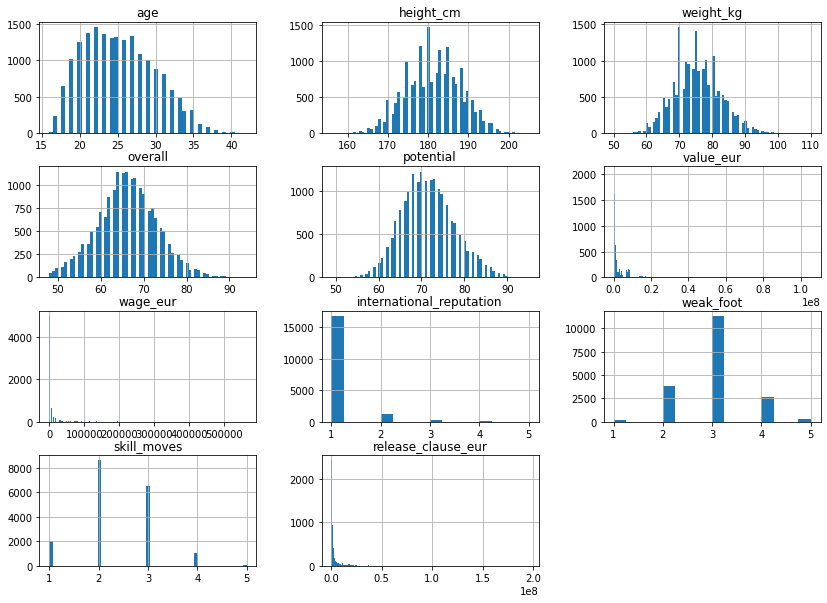

In [44]:
numeric_features = ['age','height_cm','weight_kg','overall','potential','value_eur',
                 'wage_eur','international_reputation','weak_foot',
                 'skill_moves','release_clause_eur']

# histograms of numerical features
df[numeric_features].hist(bins='auto', figsize=(14, 10))

So, we can see that

* max players are from the age group 20-25.
* maximum and patterns of other features can be seen in the histograms too.
* frequency plots of value_eur and wage_eur is highly skewed.
* international_reputation, skill_moves and weak_foot have categorical values.
* all other features have discrete values

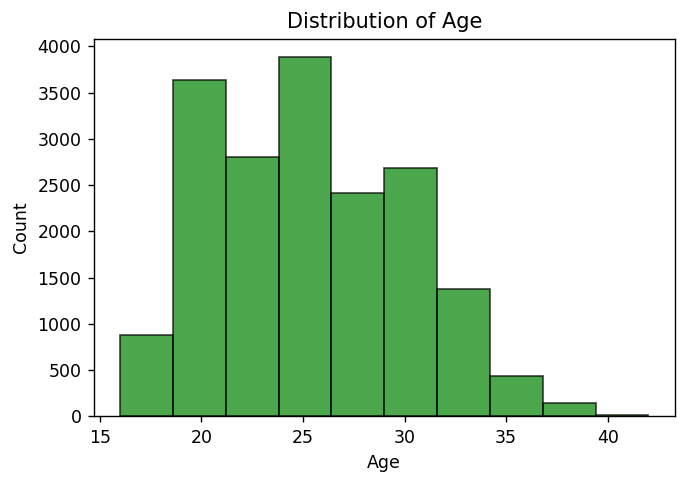

In [45]:
# histogram
# Effect of age on overall rating

plt.figure(dpi=125)
plt.hist(df.age, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


* No definite pattern is visible since the plot is vastly spread.
* But we can see that as mostly for players having age >=15 years, the overall rating of a player decreases as age increases. 
* Players in the age of range 20-25 years have highest overall rating.Players in their 30's and 40's have the lowest overall rating.



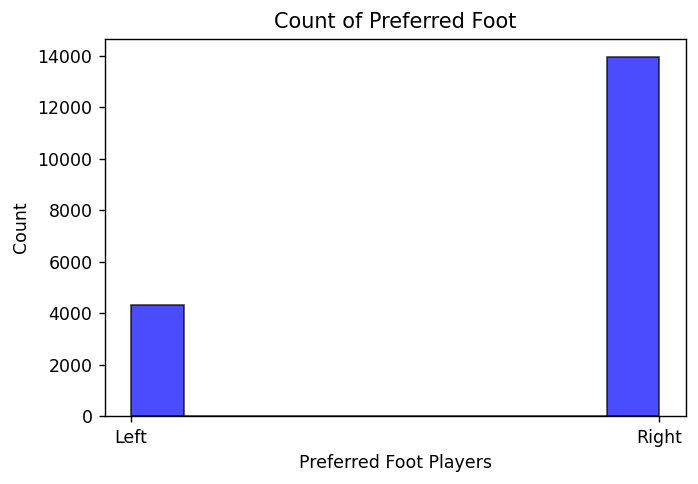

In [46]:
# histogram
# Preferred foot while playing

plt.figure(dpi=125)
plt.hist(df.preferred_foot, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')
plt.show()

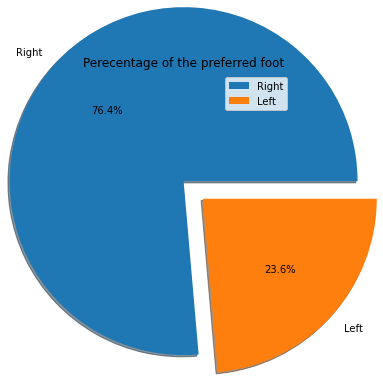

In [47]:
figsize = ()
label = df['preferred_foot'].value_counts().index
name = df['preferred_foot'].value_counts()
explode = [0,0.3]
plt.pie(name,labels = label,shadow = True,autopct='%1.1f%%',explode =explode, radius = 2)
plt.title('Perecentage of the preferred foot')
plt.legend()
plt.show()

So we can see that majority of the players prefer right foot for playing.

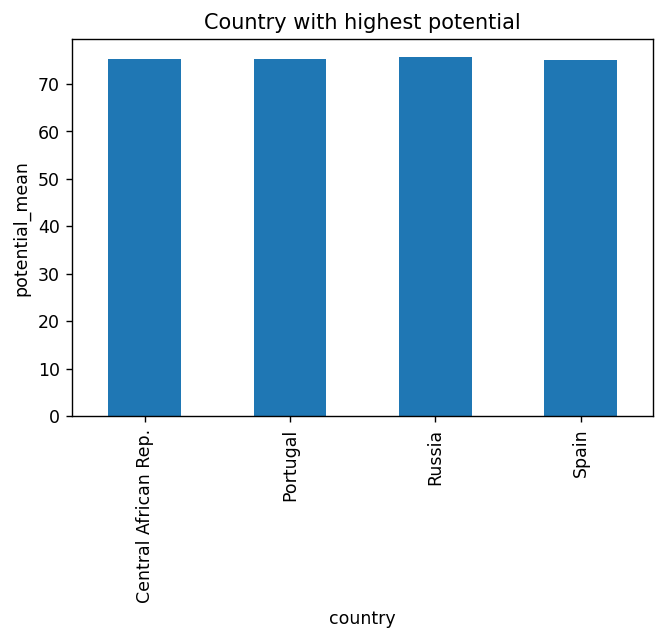

In [48]:
# histogram
# Countries with players having highest potential

plt.figure(dpi=125)
ax = plt.subplot(1,1,1)
df.groupby('nationality')['potential'].mean()[df.groupby('nationality')['potential'].mean()>75].plot.bar(ax=ax)

plt.xlabel('country')
plt.ylabel('potential_mean')
plt.title('Country with highest potential')
plt.show()

The countries having players with highest potential are : Central African Rep , Portugal , Russia , Spain

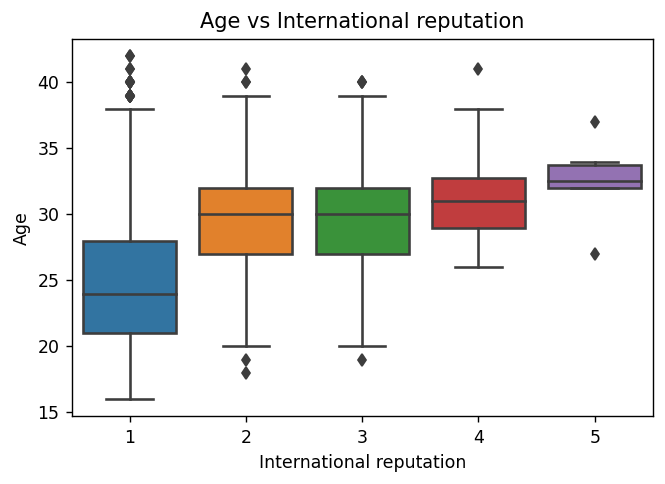

In [49]:
# box plot

plt.figure(dpi=125)
sns.boxplot(y='age',x='international_reputation',data=df)
plt.title('Age vs International reputation')
plt.ylabel('Age')
plt.xlabel('International reputation')
plt.show()

* Only a little population of players have high reputations of 5 and 4
* As age increases the international_reputation of players increases 
* Except few outlires i.e there are some exception among the players who are old but have reputation of 1 and relatively young players who have high reputation

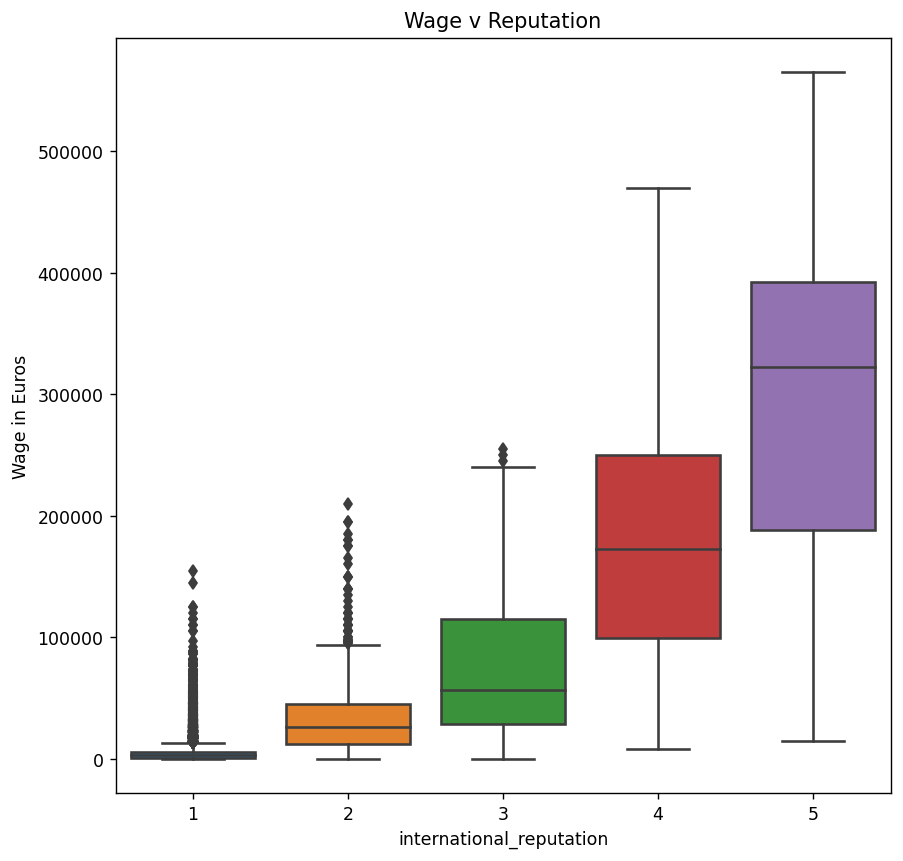

In [50]:
# box plot

plt.figure(dpi=125,figsize=(8,8))
sns.boxplot(y='wage_eur',x='international_reputation',data=df)
plt.title('Wage v Reputation')
plt.ylabel('Wage in Euros')
plt.xlabel('international_reputation')
plt.show()


* Players having high reputation have high wages 
* We can also say that wages of players increases as the international reputation of players increases .
* There are few outliers

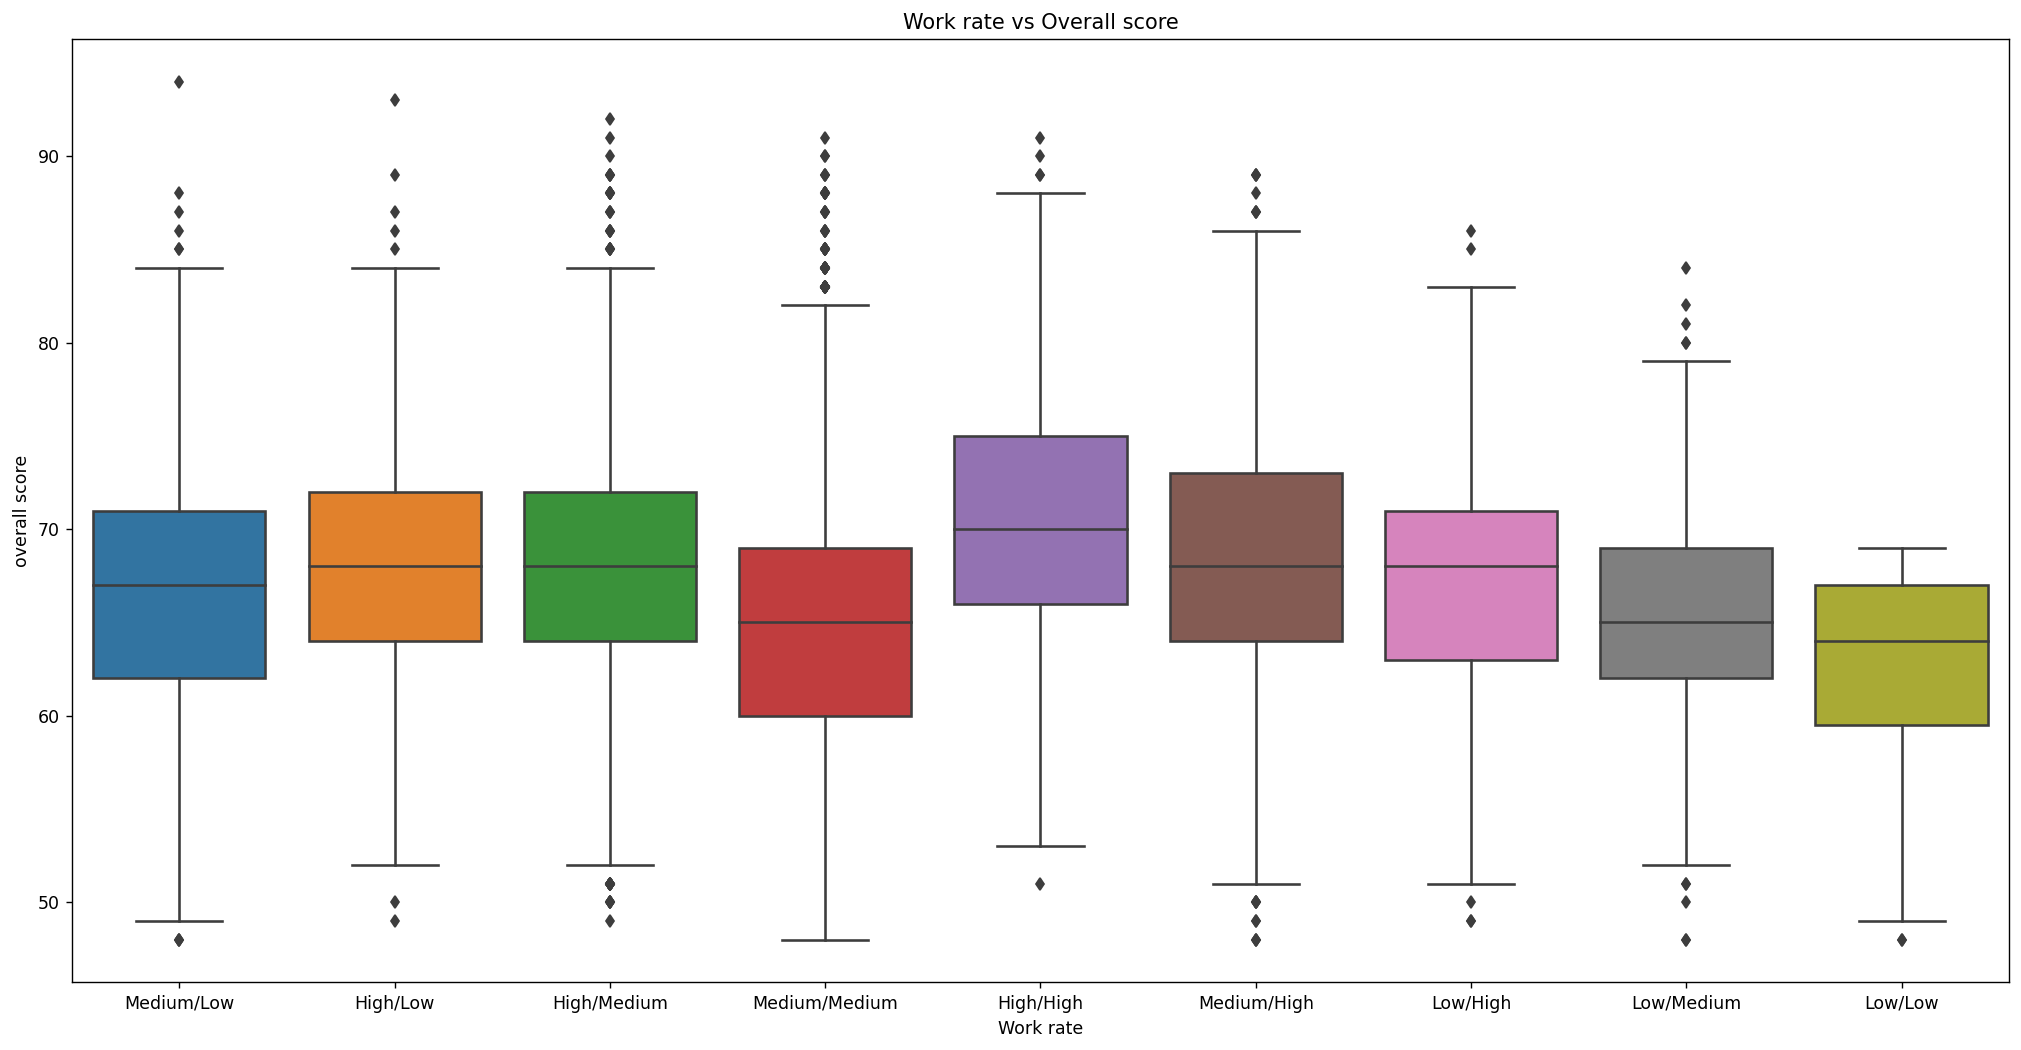

In [51]:
# box plot

plt.figure(dpi=125, figsize=(20,10))
sns.boxplot(y='overall',x='work_rate',data=df)
plt.title('Work rate vs Overall score')
plt.ylabel('overall score')
plt.xlabel('Work rate')
plt.show()

* Players with high and medium -high work rate have high overall score
* PLyers with low work rate have comparatively low overall score
* Few outliers are also there i.e exceptional players who have low work rate but high overall score or high work rate but poor score.

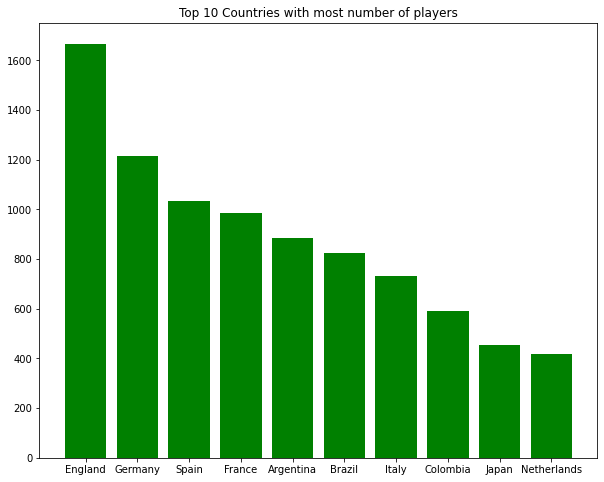

In [52]:
# Displaying top 10 countries with most number of players
top = df['nationality'].value_counts().head(10)
fig,ax = plt.subplots(figsize = (10,8))
ar = top.values
ra = top.index
ax.bar(ra,ar, color = 'green')
ax.set_title(('Top 10 Countries with most number of players'))
plt.show()

So, we see that England has the highest number of player participating.

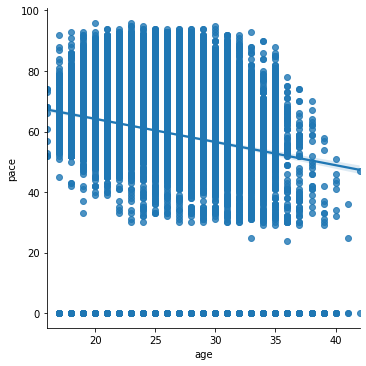

In [53]:
# scatter plot
sns.lmplot(data=df, x="age", y="pace")

From seeing the line we can say that as the age increases the pace of the players decreases , except few outliers.

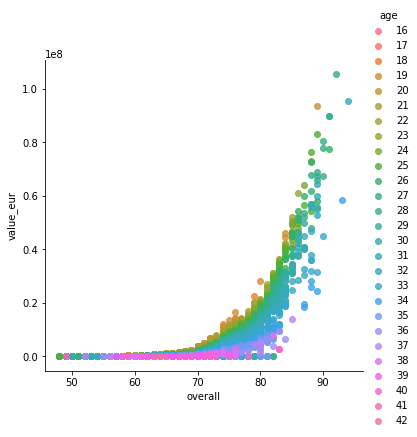

In [54]:
# Scatter Plot (colored by Age) year 2020 - Overall Rating vs Value in Euros

sns.lmplot(x = "overall", y = "value_eur", data = df, fit_reg=False, hue='age')

Players in their mid 20's and 30's have high overall rating and earn more in comparison to others. Except few outliers , the over rating and salary decreases as age increases.

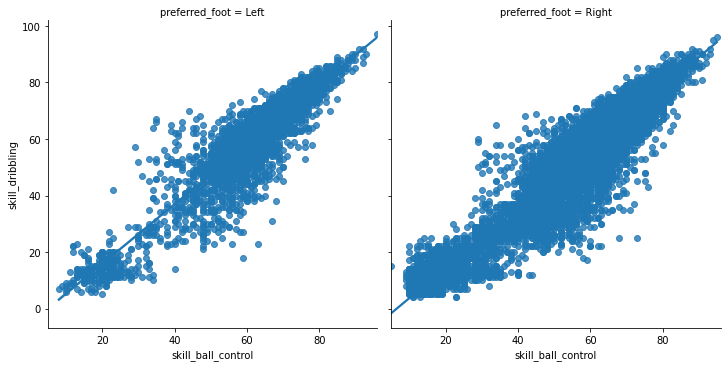

In [55]:
# scatter plot
sns.lmplot(x='skill_ball_control', y='skill_dribbling', data=df, col='preferred_foot')


* There are more players who prefers right foot for playing
* skill_ball_control and skill_dribbling are linearly dependent on each other.

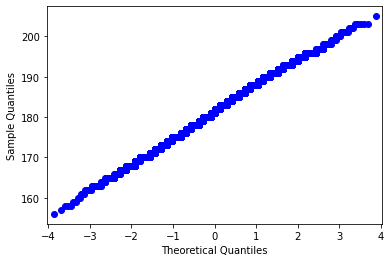

In [56]:
# qq plot
import statsmodels.api as sm
fig = sm.qqplot(df.height_cm)
plt.show()

height values of the players are normally distributed which means that majority of the players have relatively the  same height , with some few outliers .

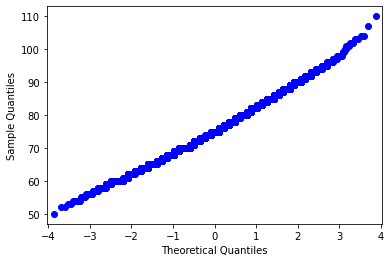

In [57]:
# qq plot
fig = sm.qqplot(df.weight_kg)
plt.show()

weight values of the players are normally distributed which means that majority of the players have relatively the  same weight , with some few outliers .

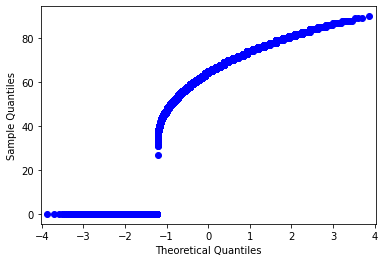

In [58]:
# qq plot
fig = sm.qqplot(df.physic)
plt.show()

physic values of the players are normally distributed which means that majority of the players have relatively the  physic value i.e majority of the players are fit , with some few outliers ( which are actually the missing values that were replaced by 0 )

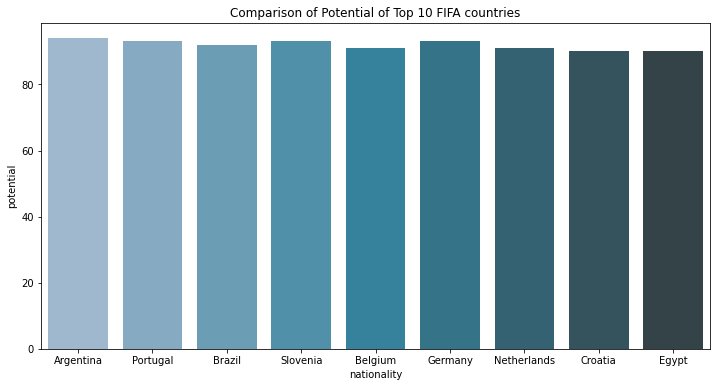

In [59]:
# Comparison of Potential of Top 10 FIFA countries

plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'nationality', y = 'potential', data = df.head(10), palette='PuBuGn_d')
plt.title('Comparison of Potential of Top 10 FIFA countries')
plt.show()

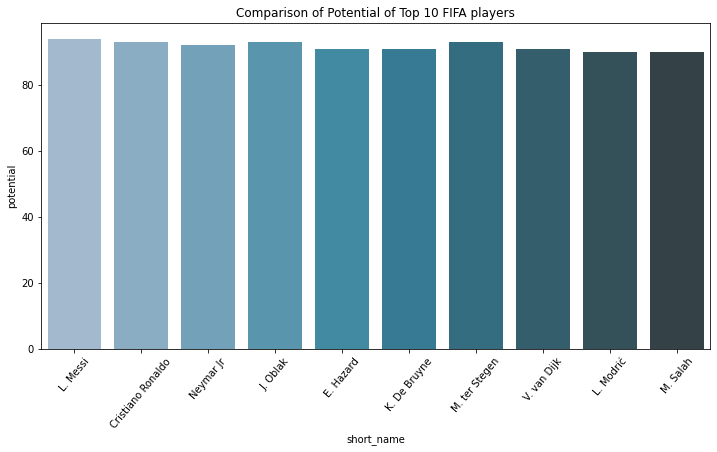

In [60]:
# comparison of potential of top 10 players

plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'short_name', y = 'potential', data = df.head(10),palette='PuBuGn_d')
plt.title('Comparison of Potential of Top 10 FIFA players')
plt.xticks(rotation = 50)
plt.show()

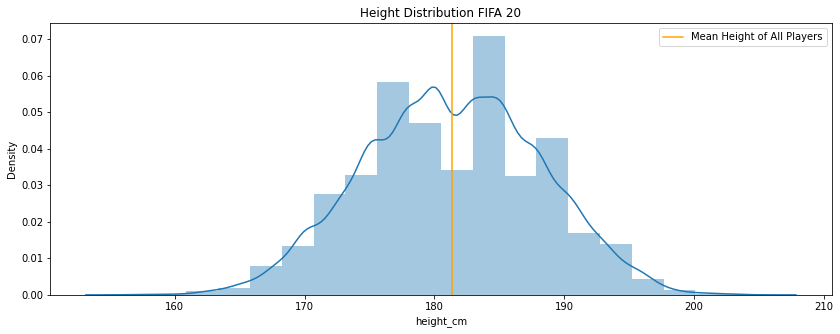

In [61]:
# height distribution and mean height

plt.figure(figsize=(14,5))
plt.title('Height Distribution FIFA 20')
sns.distplot(df['height_cm'], kde=True, bins=20)
plt.axvline(x=np.mean(df['height_cm']),c='orange',label='Mean Height of All Players')
plt.legend()

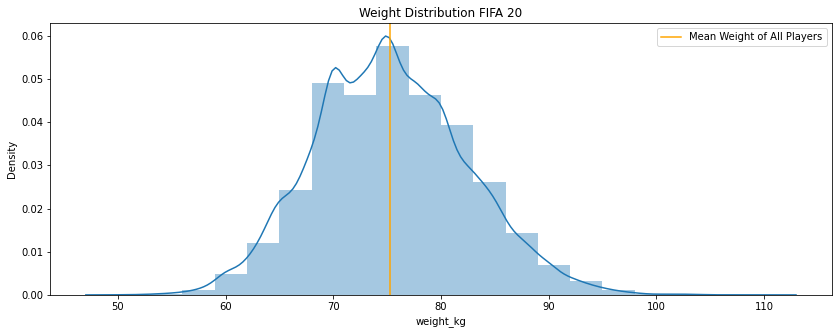

In [62]:
# Weight distribution and mean weight

plt.figure(figsize=(14,5))
plt.title('Weight Distribution FIFA 20')
sns.distplot(df['weight_kg'], kde=True, bins=20)
plt.axvline(x=np.mean(df['weight_kg']),c='orange',label='Mean Weight of All Players')
plt.legend()

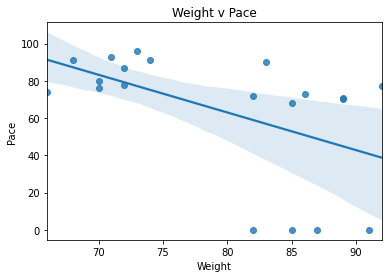

In [63]:
# Weight vs Pace

plt.figure()
x=df.head(20)['weight_kg']
y=df.head(20)['pace']

sns.regplot(x,y)
plt.title('Weight v Pace')
plt.xlabel('Weight')
plt.ylabel('Pace')
plt.show()

We observe:

* Pace tends to decrease with increase in weight.

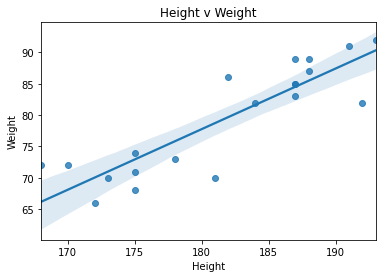

In [64]:
# Height vs weight

plt.figure()
x=df.head(20)['height_cm']
y=df.head(20)['weight_kg']

sns.regplot(x,y)
plt.title('Height v Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

We observe:

* Height and weight are linearly dependant

## **Data Anaylsis**

Average player height in FIFA

In [65]:
height = df['height_cm'].mean()
print(str(round(height,2)) + " is the average height in fifa")

181.36 is the average height in fifa


Average player weight in FIFA

In [66]:
weight = df['weight_kg'].mean()
print(str(round(weight,2)) + " is the average weight in fifa")

75.28 is the average weight in fifa


10 Oldest players

In [67]:
df.sort_values(by = 'age' , ascending = False)[['short_name','club','nationality','overall', 'age' ]].head(10)

,short_name,club,nationality,overall,age
13003,H. Sulaimani,Al Ahli,Saudi Arabia,63,42
11832,C. Muñoz,CD Universidad de Concepción,Argentina,64,42
200,G. Buffon,Juventus,Italy,83,41
3706,C. Lucchetti,Atlético Tucumán,Argentina,72,41
10665,F. Kippe,Lillestrøm SK,Norway,65,41
868,Hilton,Montpellier HSC,Brazil,78,41
2965,Cifuentes,Cádiz CF,Spain,73,40
15812,M. Gurski,SpVgg Unterhaching,Germany,59,40
8359,F. Cubero,Vélez Sarsfield,Argentina,67,40
2963,D. Dainelli,Livorno,Italy,73,40


10 youngest players

In [68]:
df.sort_values(by = 'age' , ascending = True)[['short_name','club','nationality','overall', 'age' ]].head(10)

,short_name,club,nationality,overall,age
18171,J. Starbuck,Grimsby Town,England,49,16
4764,A. Hložek,Sparta Praha,Czech Republic,70,16
18243,E. Sartorius,Lincoln City,England,48,16
17827,D. Burns,St. Patrick's Athletic,Northern Ireland,52,16
17614,D. Obbekjær,Odense Boldklub,Denmark,53,16
17782,S. Anderson,Colorado Rapids,United States,52,16
18242,R. Wikberg,Östersunds FK,Sweden,48,16
18031,O. Stefánsson,IFK Norrköping,Iceland,51,16
14626,A. Velasco,Independiente,Argentina,60,16
12160,S. Esposito,Inter,Italy,63,16


Top 5 Best ball controllers

In [69]:
df.sort_values(by = 'skill_ball_control' , ascending = False)[['short_name','club','nationality','overall', 'age','skill_ball_control']].head()

,short_name,club,nationality,overall,age,skill_ball_control
0,L. Messi,FC Barcelona,Argentina,94,32,96
2,Neymar Jr,Paris Saint-Germain,Brazil,92,27,95
4,E. Hazard,Real Madrid,Belgium,91,28,94
62,Isco,Real Madrid,Spain,86,27,93
54,L. Insigne,Napoli,Italy,87,28,93


Top 5 Best defenders

In [70]:
df.sort_values(by = 'defending' , ascending = False)[['short_name','club','nationality','overall', 'age','defending']].head()

,short_name,club,nationality,overall,age,defending
16,G. Chiellini,Juventus,Italy,89,34,90.0
7,V. van Dijk,Liverpool,Netherlands,90,27,90.0
35,D. Godín,Inter,Uruguay,88,33,89.0
11,K. Koulibaly,Napoli,Senegal,89,28,89.0
49,M. Hummels,Borussia Dortmund,Germany,87,30,89.0


Top 5 best shooters

In [71]:
df.sort_values(by = 'shooting' , ascending = False)[['short_name','club','nationality','overall', 'age','shooting']].head()

,short_name,club,nationality,overall,age,shooting
1,Cristiano Ronaldo,Juventus,Portugal,93,34,93.0
0,L. Messi,FC Barcelona,Argentina,94,32,92.0
12,H. Kane,Tottenham Hotspur,England,89,25,91.0
17,S. Agüero,Manchester City,Argentina,89,31,90.0
19,L. Suárez,FC Barcelona,Uruguay,89,32,89.0


Top 5 best dribblers

In [72]:
df.sort_values(by = 'dribbling' , ascending = False)[['short_name','club','nationality','overall', 'age','dribbling']].head()

,short_name,club,nationality,overall,age,dribbling
0,L. Messi,FC Barcelona,Argentina,94,32,96.0
2,Neymar Jr,Paris Saint-Germain,Brazil,92,27,95.0
4,E. Hazard,Real Madrid,Belgium,91,28,94.0
41,Bernardo Silva,Manchester City,Portugal,87,24,92.0
150,Douglas Costa,Juventus,Brazil,84,28,91.0


Top 5 quickest players

In [73]:
df.sort_values(by = 'movement_acceleration' , ascending = False)[['short_name','club','nationality','overall', 'age','movement_acceleration']].head()

,short_name,club,nationality,overall,age,movement_acceleration
2167,Adama Traoré,Wolverhampton Wanderers,Spain,74,23,97
10,K. Mbappé,Paris Saint-Germain,France,89,20,96
26,R. Sterling,Manchester City,England,88,24,96
754,I. Sarr,Watford,Senegal,78,21,95
197,Lucas Moura,Tottenham Hotspur,Brazil,83,26,95


Top 5 highest earners

In [74]:
df.sort_values(by = 'wage_eur' , ascending = False)[['short_name','club','nationality','overall', 'age','wage_eur']].head()

,short_name,club,nationality,overall,age,wage_eur
0,L. Messi,FC Barcelona,Argentina,94,32,565000
4,E. Hazard,Real Madrid,Belgium,91,28,470000
1,Cristiano Ronaldo,Juventus,Portugal,93,34,405000
5,K. De Bruyne,Manchester City,Belgium,91,28,370000
22,A. Griezmann,FC Barcelona,France,89,28,370000
